<a href="https://colab.research.google.com/github/springboardmentor2001-sudo/Smart-Energy-Consumption-Analysis-and-Prediction/blob/nithin-kamatam/Smart_Energy_Consumption_Analysis_and_Prediction_EDA_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf




In [ ]:
df = pd.read_csv("Energy_consumption.csv")
df.head()


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [ ]:
print("Shape:", df.shape)
df.info()


Shape: (1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [ ]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1000,1000,2022-02-11 15:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,1000.0,NaN,NaN,NaN,24.982026,2.83685,20.007565,22.64507,24.751637,27.418174,29.998671
Humidity,1000.0,NaN,NaN,NaN,45.395412,8.518905,30.015975,38.297722,45.972116,52.420066,59.969085
SquareFootage,1000.0,NaN,NaN,NaN,1500.052488,288.418873,1000.512661,1247.108548,1507.967426,1740.340165,1999.982252
Occupancy,1000.0,NaN,NaN,NaN,4.581,2.865598,0.0,2.0,5.0,7.0,9.0
HVACUsage,1000,2,Off,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LightingUsage,1000,2,Off,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RenewableEnergy,1000.0,NaN,NaN,NaN,15.132813,8.745917,0.006642,7.628385,15.072296,22.884064,29.965327
DayOfWeek,1000,7,Friday,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,1000,2,No,533,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()


,0
Timestamp,0
Temperature,0
Humidity,0
SquareFootage,0
Occupancy,0
HVACUsage,0
LightingUsage,0
RenewableEnergy,0
DayOfWeek,0
Holiday,0


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.set_index('Timestamp', inplace=True)


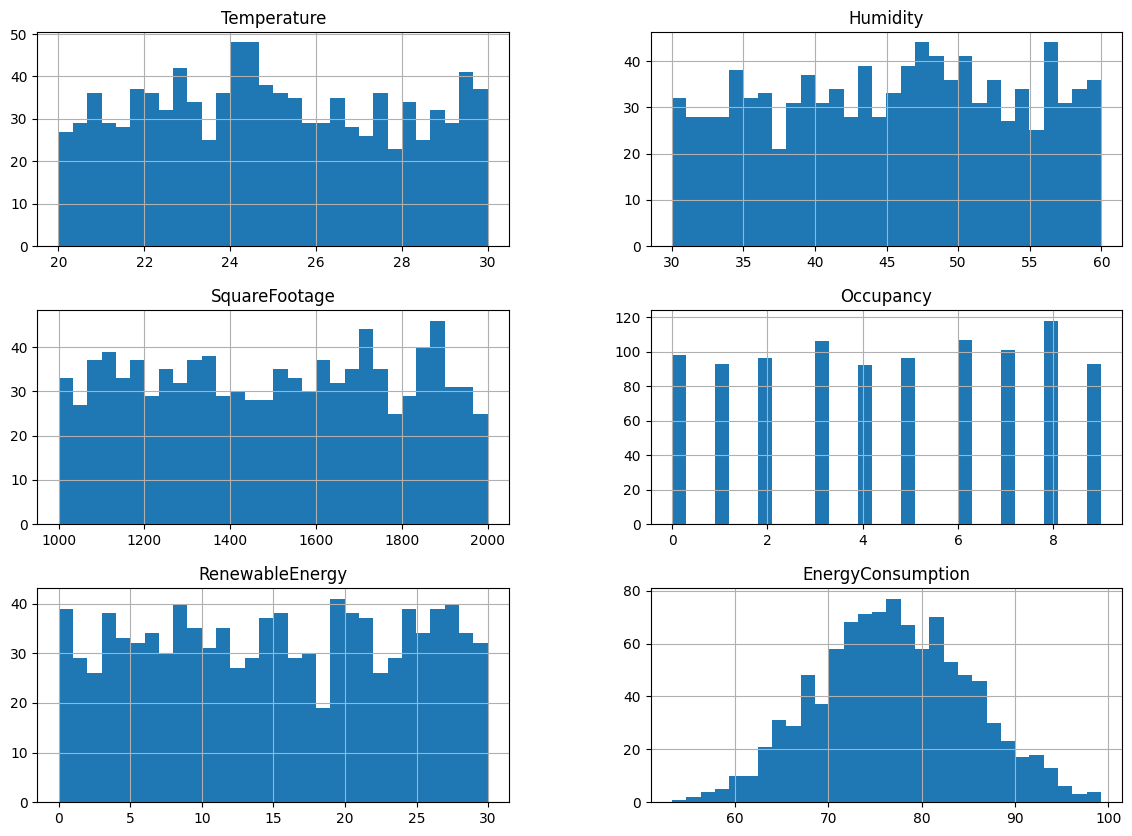

In [ ]:
df.hist(figsize=(14,10), bins=30)
plt.show()


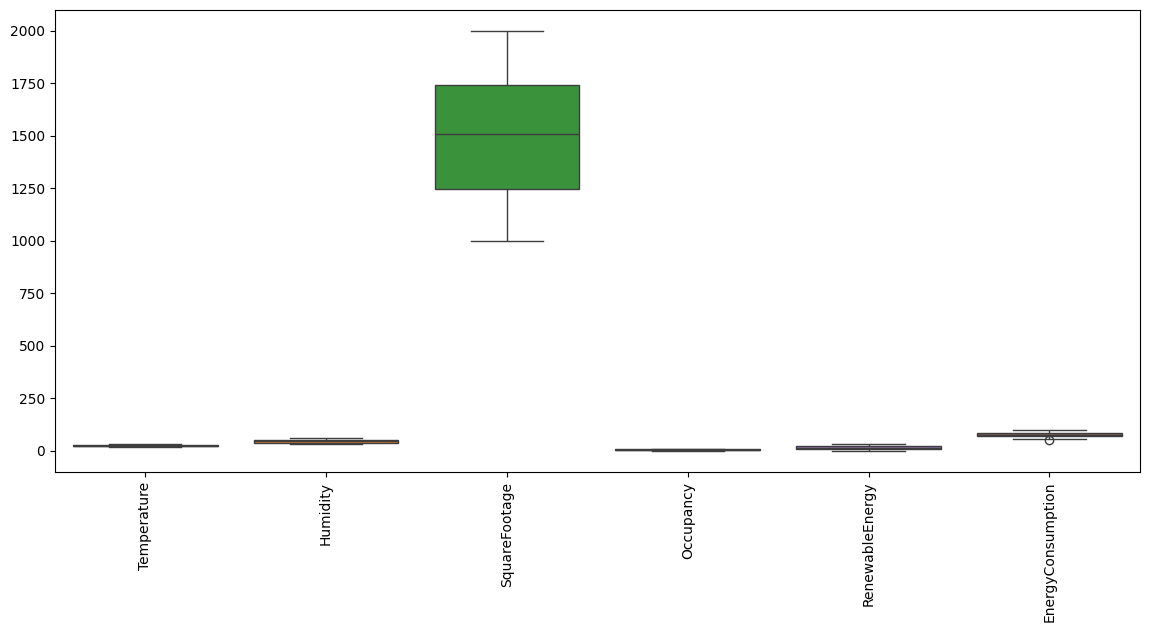

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()


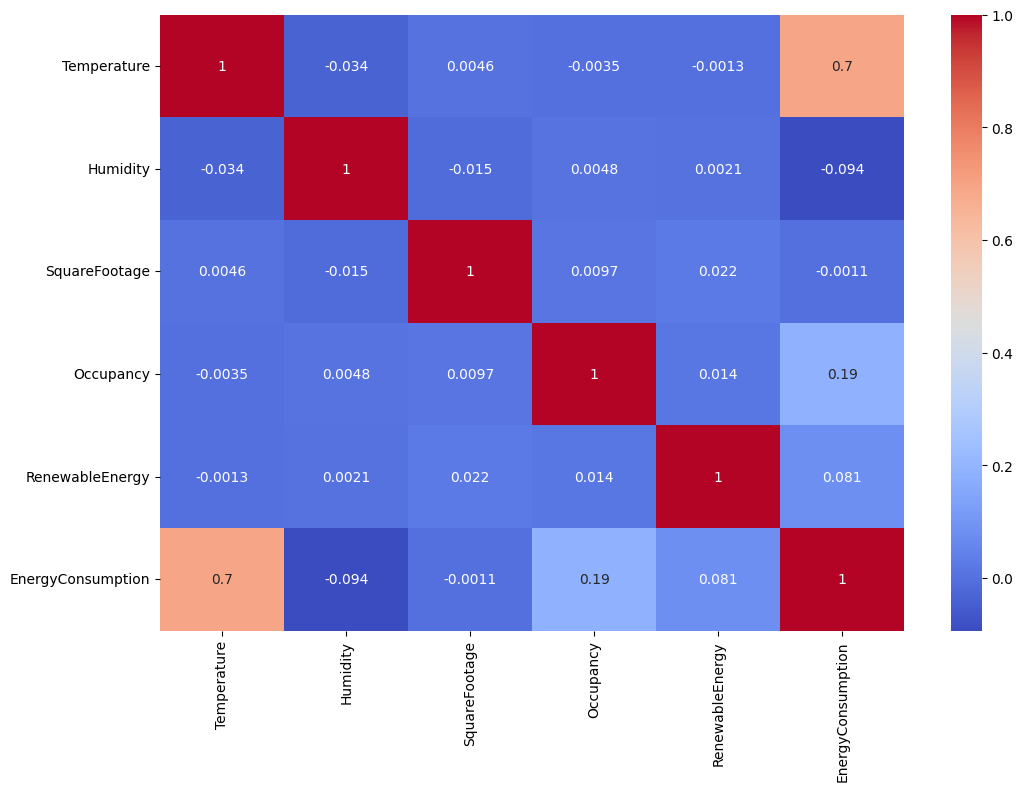

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()

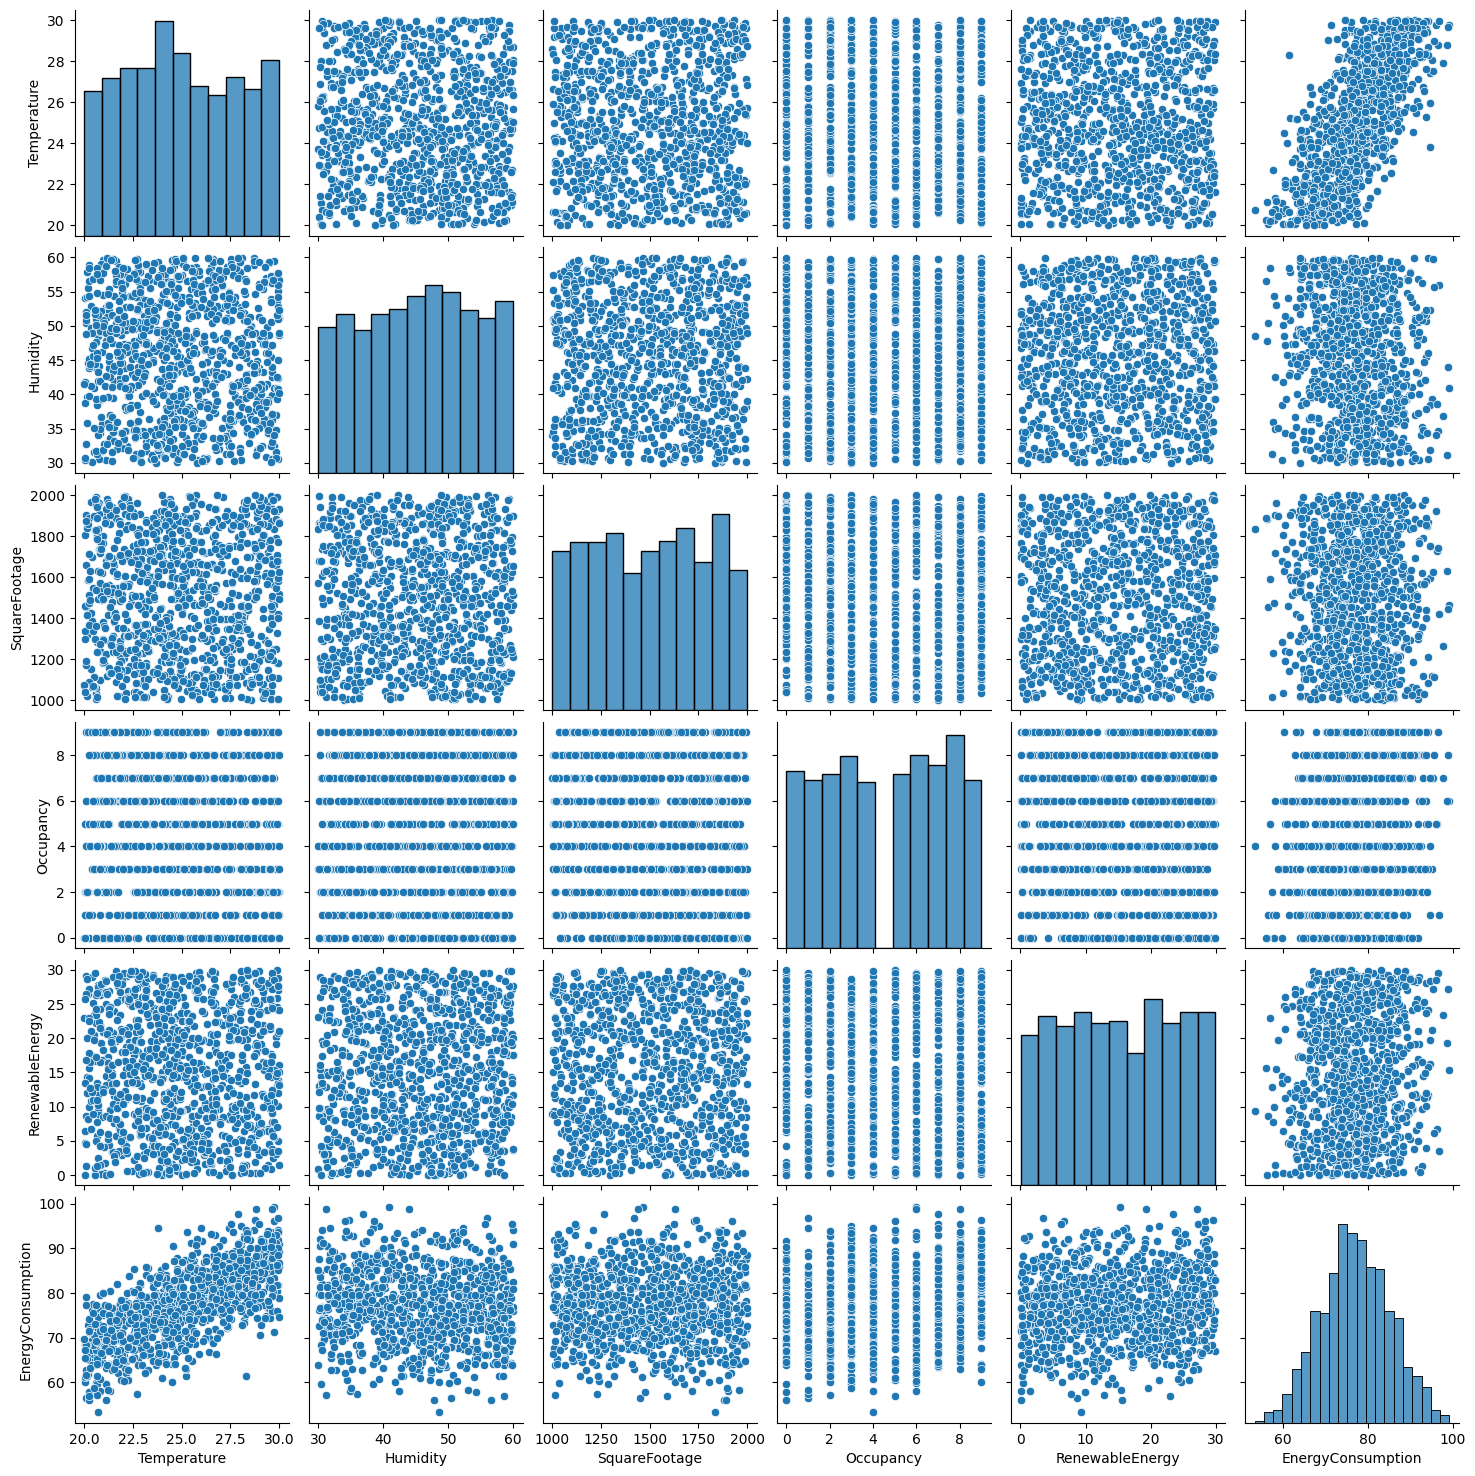

In [ ]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()


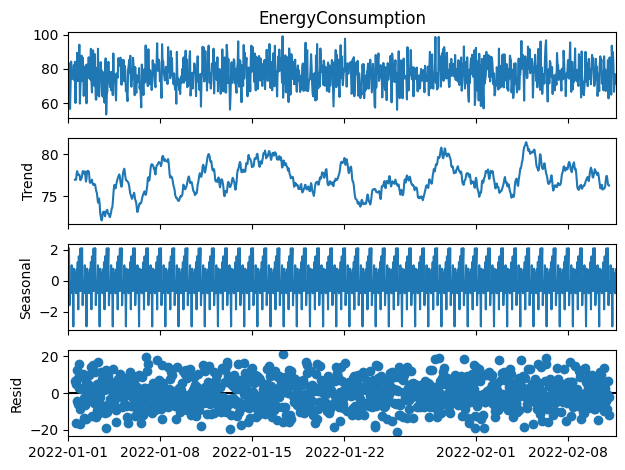

In [ ]:
decompose = seasonal_decompose(df['EnergyConsumption'].dropna(), model='additive', period=24)
decompose.plot()
plt.show()


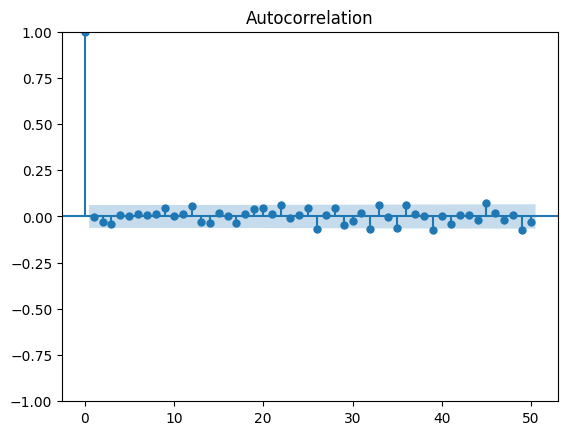

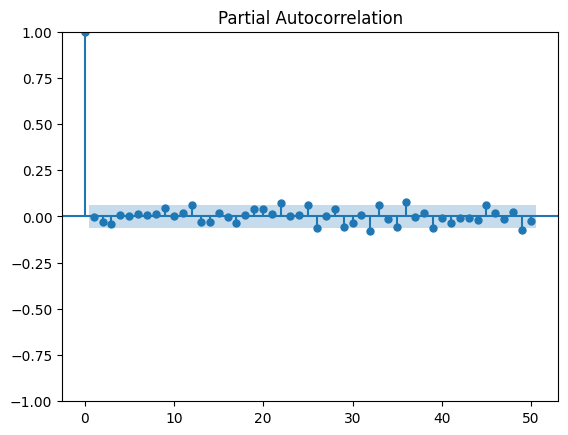

In [ ]:
plot_acf(df['EnergyConsumption'].dropna(), lags=50)
plt.show()

plot_pacf(df['EnergyConsumption'].dropna(), lags=50)
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include=np.number)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
outliers.sum()

,0
Temperature,0
Humidity,0
SquareFootage,0
Occupancy,0
RenewableEnergy,0
EnergyConsumption,1


In [ ]:
iso = IsolationForest(contamination=0.01, random_state=42)
df['outlier'] = iso.fit_predict(df.select_dtypes(include=np.number))
df['outlier'].value_counts()


,count
outlier,
1,990
-1,10


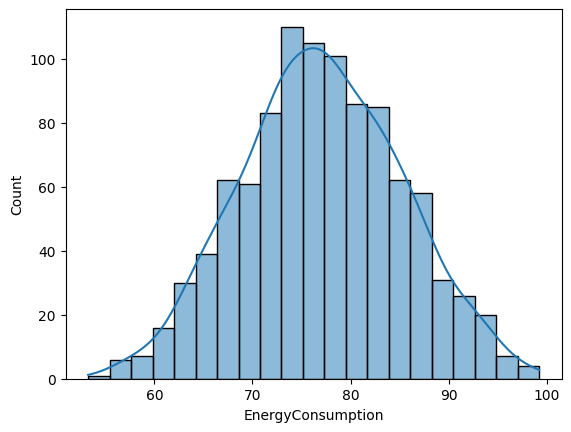

In [ ]:
sns.histplot(df['EnergyConsumption'], kde=True)
plt.show()


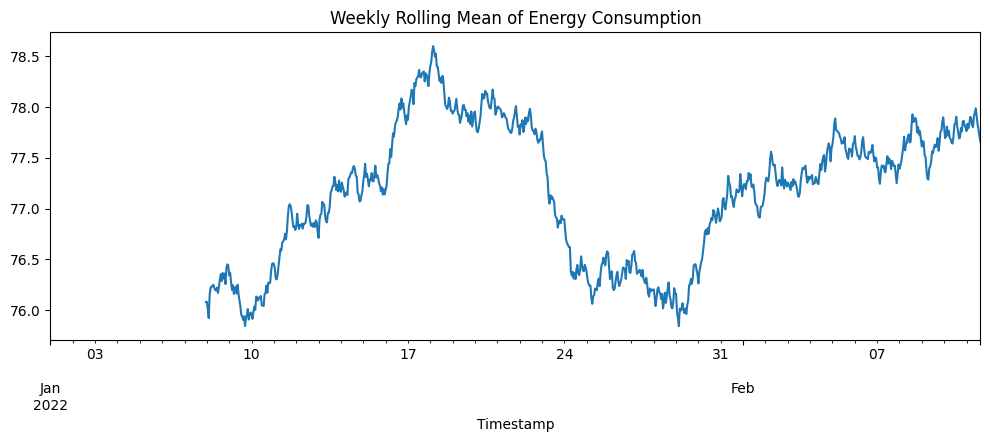

In [ ]:
df['EnergyConsumption'].rolling(168).mean().plot(figsize=(12,4))
plt.title("Weekly Rolling Mean of Energy Consumption")
plt.show()


In [ ]:
target_corr = df.select_dtypes(include=np.number).corr()['EnergyConsumption'].sort_values(ascending=False)
target_corr

,EnergyConsumption
EnergyConsumption,1.000000
Temperature,0.696410
Occupancy,0.186580
RenewableEnergy,0.081160
outlier,0.038508
SquareFootage,-0.001129
Humidity,-0.093583


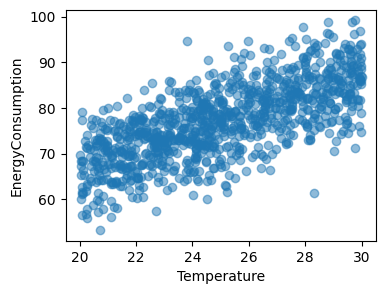

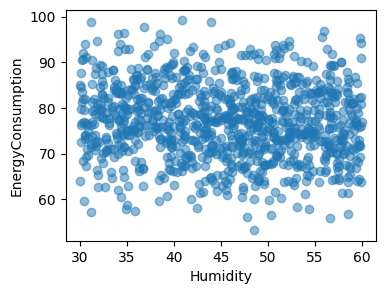

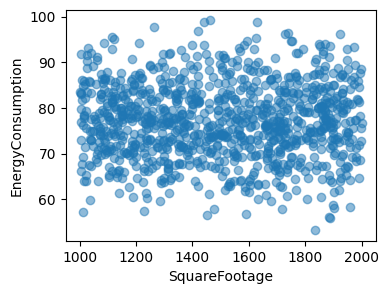

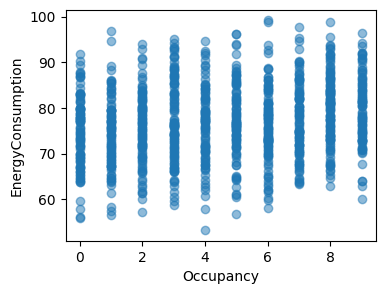

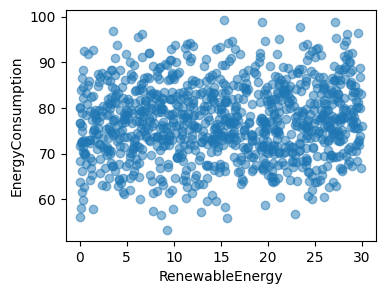

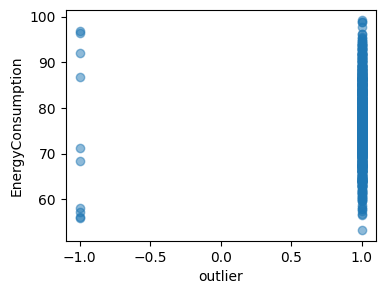

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    if col != 'EnergyConsumption':
        plt.figure(figsize=(4,3))
        plt.scatter(df[col], df['EnergyConsumption'], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel('EnergyConsumption')
        plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.select_dtypes(include=np.number).dropna()
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])]

vif_df


,Feature,VIF
0,Temperature,152.635129
1,Humidity,23.891548
2,SquareFootage,23.743354
3,Occupancy,3.828274
4,RenewableEnergy,4.036998
5,EnergyConsumption,171.677703
6,outlier,22.323231


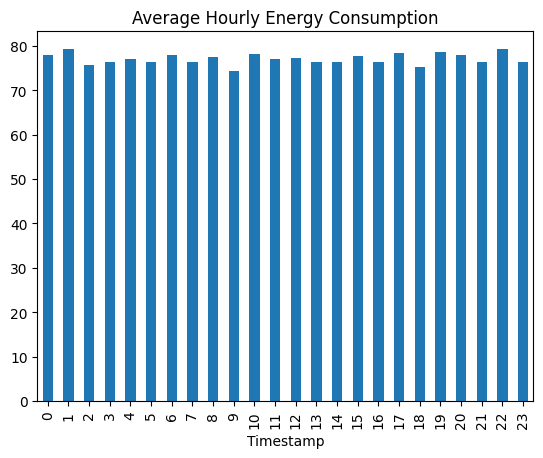

In [ ]:
df.groupby(df.index.hour)['EnergyConsumption'].mean().plot(kind='bar')
plt.title("Average Hourly Energy Consumption")
plt.show()

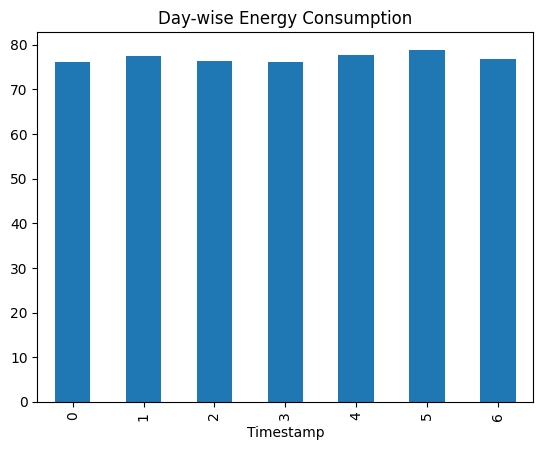

In [ ]:
df.groupby(df.index.dayofweek)['EnergyConsumption'].mean().plot(kind='bar')
plt.title("Day-wise Energy Consumption")
plt.show()

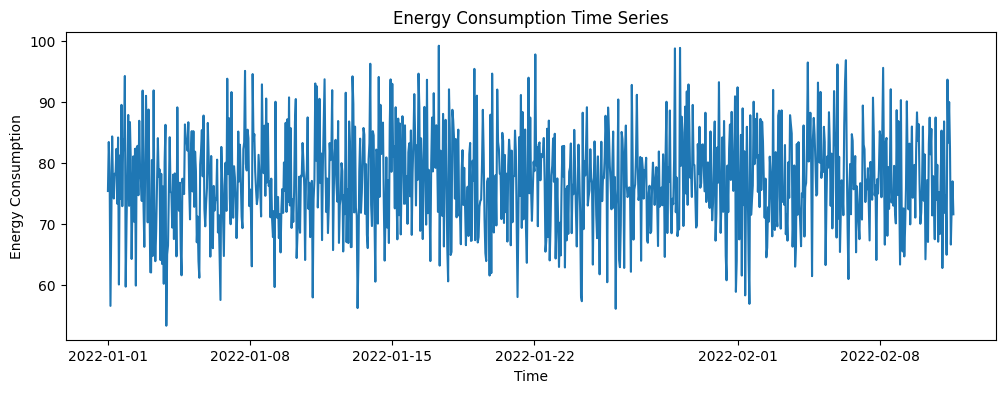

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df['EnergyConsumption'])
plt.title("Energy Consumption Time Series")
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

adf_test(df['EnergyConsumption'])

ADF Statistic: -31.576934146718372
p-value: 0.0


In [ ]:
if 'Temperature' in df.columns:
    df['temp_squared'] = df['Temperature'] ** 2
    df['temp_energy_interaction'] = df['Temperature'] * df['EnergyConsumption']


In [ ]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)


In [ ]:
df['hour_sin'] = np.sin(2 * np.pi * df.index.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * df.index.hour / 24)

df['month_sin'] = np.sin(2 * np.pi * df.index.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df.index.month/ 12)


In [ ]:
TARGET = "EnergyConsumption"

In [ ]:
lags = [1, 2, 3, 6, 12, 24, 48, 72, 168]

for lag in lags:
    df[f'lag_{lag}'] = df[TARGET].shift(lag)





In [ ]:
windows = [3, 6, 12, 24, 72, 168]

for w in windows:
    df[f'roll_mean_{w}'] = df[TARGET].rolling(w).mean()
    df[f'roll_std_{w}'] = df[TARGET].rolling(w).std()
    df[f'roll_min_{w}'] = df[TARGET].rolling(w).min()
    df[f'roll_max_{w}'] = df[TARGET].rolling(w).max()
    df[f'roll_range_{w}'] = df[f'roll_max_{w}'] - df[f'roll_min_{w}']


In [ ]:
df['diff_1'] = df[TARGET].diff(1)
df['diff_24'] = df[TARGET].diff(24)

df['pct_change_1'] = df[TARGET].pct_change(1)
df['pct_change_24'] = df[TARGET].pct_change(24)


In [ ]:
df['expanding_mean'] = df[TARGET].expanding().mean()
df['expanding_std'] = df[TARGET].expanding().std()


In [ ]:
df['is_night'] = ((df['hour'] >= 0) & (df['hour'] < 6)).astype(int)
df['is_morning'] = ((df['hour'] >= 6) & (df['hour'] < 12)).astype(int)
df['is_afternoon'] = ((df['hour'] >= 12) & (df['hour'] < 18)).astype(int)
df['is_evening'] = ((df['hour'] >= 18) & (df['hour'] < 24)).astype(int)


In [ ]:


df_feature_engineered = df.dropna()

df_feature_engineered.shape



(832, 71)

In [ ]:
df_feature_engineered.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,outlier,temp_squared,temp_energy_interaction,hour,...,diff_1,diff_24,pct_change_1,pct_change_24,expanding_mean,expanding_std,is_night,is_morning,is_afternoon,is_evening
count,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,...,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000
mean,25.019205,45.527818,1507.149789,4.532452,15.078580,77.253135,0.975962,634.022976,1948.744174,11.423077,...,-0.001617,-0.061546,0.011267,0.010077,76.846080,8.248443,0.252404,0.252404,0.250000,0.245192
std,2.841141,8.589192,290.790532,2.858711,8.757511,8.105418,0.218074,142.894935,390.451840,6.911080,...,11.503043,11.316136,0.153093,0.149563,0.263951,0.083551,0.434653,0.434653,0.433273,0.430460
min,20.007565,30.015975,1000.512661,0.000000,0.006642,56.038163,-1.000000,400.302661,1135.624085,0.000000,...,-36.078411,-34.043674,-0.363690,-0.369989,75.974721,8.032868,0.000000,0.000000,0.000000,0.000000
25%,22.693542,38.398916,1253.636155,2.000000,7.497639,71.593476,1.000000,514.997005,1639.629690,5.000000,...,-8.649550,-7.624416,-0.105653,-0.094215,76.788388,8.187854,0.000000,0.000000,0.000000,0.000000
50%,24.815168,46.095719,1512.176799,5.000000,14.990829,77.039172,1.000000,615.792737,1919.174292,11.000000,...,0.029050,0.302428,0.000405,0.003653,76.939055,8.232345,0.000000,0.000000,0.000000,0.000000
75%,27.461720,52.753217,1754.211425,7.000000,22.884064,83.031937,1.000000,754.146129,2239.195959,17.000000,...,7.807000,7.787034,0.108611,0.110269,77.038519,8.310017,1.000000,1.000000,0.250000,0.000000
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120,1.000000,899.920252,2952.642266,23.000000,...,32.731434,33.610439,0.544291,0.531671,77.157070,8.444546,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_feature_engineered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 832 entries, 2022-01-08 00:00:00 to 2022-02-11 15:00:00
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature              832 non-null    float64
 1   Humidity                 832 non-null    float64
 2   SquareFootage            832 non-null    float64
 3   Occupancy                832 non-null    int64  
 4   HVACUsage                832 non-null    object 
 5   LightingUsage            832 non-null    object 
 6   RenewableEnergy          832 non-null    float64
 7   DayOfWeek                832 non-null    object 
 8   Holiday                  832 non-null    object 
 9   EnergyConsumption        832 non-null    float64
 10  outlier                  832 non-null    int64  
 11  temp_squared             832 non-null    float64
 12  temp_energy_interaction  832 non-null    float64
 13  hour                     832 non-null    in

In [ ]:
df_feature_engineered.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,...,diff_1,diff_24,pct_change_1,pct_change_24,expanding_mean,expanding_std,is_night,is_morning,is_afternoon,is_evening
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-08 00:00:00,25.714735,42.298665,1999.204208,1,On,On,29.565863,Saturday,No,75.614982,...,2.724398,1.435938,0.037377,0.019358,76.076210,8.263825,1,0,0,0
2022-01-08 01:00:00,20.914792,31.710094,1486.780868,5,Off,On,4.306860,Friday,No,71.789647,...,-3.825335,1.874506,-0.050590,0.026811,76.050995,8.245896,1,0,0,0
2022-01-08 02:00:00,25.205341,48.649901,1533.208172,3,Off,Off,4.054743,Wednesday,No,63.008158,...,-8.781490,-28.586197,-0.122323,-0.312096,75.974721,8.281888,1,0,0,0
2022-01-08 03:00:00,25.976524,38.484153,1595.427693,4,On,On,16.205204,Tuesday,No,94.550625,...,31.542467,18.411670,0.500609,0.241817,76.082720,8.378230,1,0,0,0
2022-01-08 04:00:00,27.726414,53.339179,1751.722623,2,On,Off,21.647358,Wednesday,Yes,83.576831,...,-10.973794,12.599917,-0.116063,0.177521,76.126039,8.373247,1,0,0,0


In [ ]:
df['Rolling_Mean_3'] = df['EnergyConsumption'].rolling(window=3).mean()
df['Rolling_Mean_7'] = df['EnergyConsumption'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['EnergyConsumption'].rolling(window=7).std()

In [ ]:
df['Diff_1'] = df['EnergyConsumption'].diff()
df['Pct_Change'] = df['EnergyConsumption'].pct_change()


In [ ]:
df['Log_Energy'] = np.log1p(df['EnergyConsumption'])


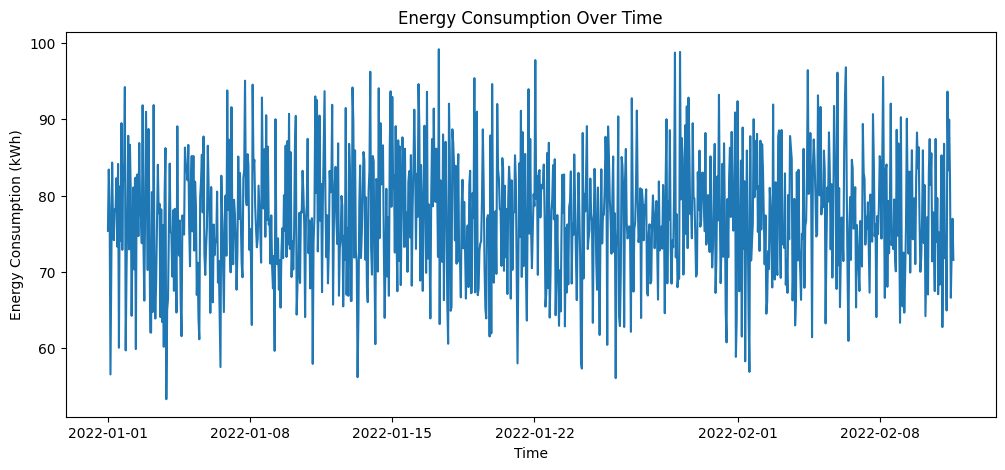

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['EnergyConsumption'])
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Over Time")
plt.show()

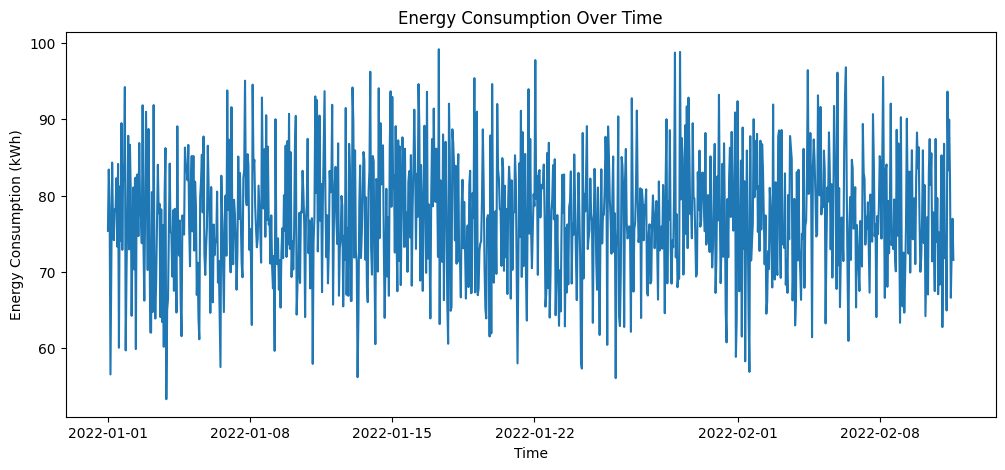

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['EnergyConsumption'])
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Over Time")
plt.show()


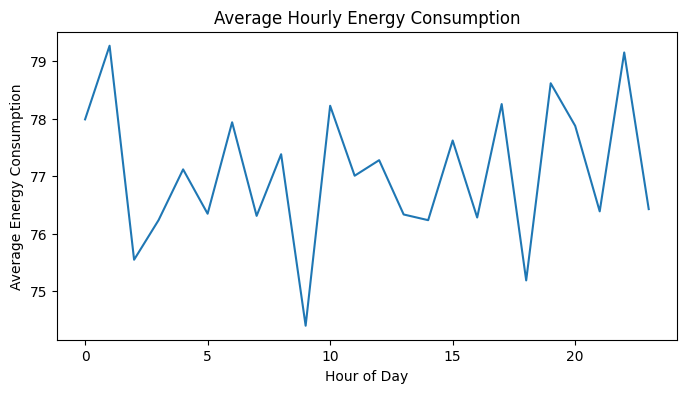

In [ ]:
hourly_avg = df.groupby('hour')['EnergyConsumption'].mean()

plt.figure(figsize=(8,4))
plt.plot(hourly_avg.index, hourly_avg.values)
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy Consumption")
plt.title("Average Hourly Energy Consumption")
plt.show()

In [ ]:
categorical_cols = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

target = "EnergyConsumption"

X = df_encoded.drop(columns=[target])
y = df_encoded[target]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True   # False if time-series
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ))
])

ValueError: could not convert string to float: 'Off'